In [1]:
import random

class Kuhn_Poker:
    def __init__(self, p1 = 2, p2 = 2):
        self.pot = 0
        self.p1 = p1
        self.p2 = p2
        self.a1 = None
        self.a2 = None
        self.actions = ['check','raise','fold']
        self.cards = {'king':3, 'queen':2, 'jack':1}
        
    def deal(self):
        cards = list(self.cards.keys())
        p1 = random.choice(cards)
        cards.remove(p1)
        p2 = random.choice(cards)
        return p1, p2
    
    def place_bet(self, player, amount):
        self.pot += amount
        setattr(self, player, getattr(self, player) - amount)
    
    def choose_action(self, player, action, amount = 1):
        if isinstance(action, int):
            setattr(self, f'a{player[-1]}', self.actions[action])
        elif str(action).lower() in self.actions:
            setattr(self, f'a{player[-1]}', str(action).lower())
        else:
            return False
        if getattr(self, f'a{player[-1]}') == 'raise' or getattr(self, f'a{player[-1]}') == 'call':
            game.place_bet(player, amount)
        return True
    
    def pay_out(self, p1, p2):
        if self.cards[p1] > self.cards[p2]:
            self.p1 += self.pot
        else:
            self.p2 += self.pot
        self.pot = 0
        
game = Kuhn_Poker()

#Anti up
game.place_bet('p1', 1)
game.place_bet('p2', 1)

#Deal cards
p1, p2 = game.deal()

#Choose action
game.choose_action('p1', 'Check')
game.choose_action('p2', 'Raise')
game.choose_action('p1', 'Call')

game.pay_out(p1, p2)
print(f'player 1 = ${game.p1}\nplayer 2 = ${game.p2}')

player 1 = $1
player 2 = $3


## Nash Equilibrium (Aproximation)
$u_{1}(\sigma) + \epsilon \geq \underset{\sigma^{'}_{1}\epsilon \sum_{1}}{\text{max}}u_{1}(\sigma^{'}_{1},\sigma_{2})$ <br>
$u_{2}(\sigma) + \epsilon \geq \underset{\sigma^{'}_{2}\epsilon \sum_{2}}{\text{max}}u_{2}(\sigma^{'}_{2},\sigma_{2})$

$u=\text{utility function}$ <br>
$\sigma=\text{player strategy}$

What this means is that both players are playing to win, meaning they are each playing their best reponces to the players strategy. Because both players are trying to win this makes the best each player can do is tie. Nash equilibrium has an exploitability of zero meaning it is theoretically a unbeatable strategy making it optimal for most games.

## Regret-Matching+
$r(s,a)=v_{i}(s,a)-\sum_{b \epsilon A(s)}{p(s,b)v_{i}(s,b)}$

$r=\text{beliefs (range)}$ <br>
$v=\text{counterfactual value}$ <br>
$p=\text{player policy}$ <br>
$s=\text{public state}$

$Q^{t}(s,a)=\left(Q^{t-1}(s,a)+r^{t}(s,a)\right)^{+}$

$Q=\text{regret like value}$ <br>
$s=\text{public state}$ <br>
$a=\text{action}$ <br>
$r=\text{beliefs (range)}$ <br>
$t=\text{time step}$ <br>
$x^{+}=max(x,0)$

$\pi^{t+1}(s,a)=\frac{Q^{t}(s,a)}{\sum_{b}{Q^{t}(s,b)}}$

$\pi=\text{player strategy}$ <br>
$s=\text{public state}$ <br>
$Q=\text{regret like value}$

## Linearly weighted policy averaging

$\bar{\pi}^{T}_{i}=\frac{2}{(T^{2}+T)\sum^{T}_{t=1}{t\pi^{t}_{i}}}$

$\pi=\text{player strategy}$ <br>
$i=\text{player}$ <br>
$T=\text{Iterations}$

## pUCT

$pUCT=Q(s,a)+P(s,a) \cdot \frac{\sqrt{\sum_{b}{N(s,b)}}}{1+N(s,a)}\left(c_{1}+log\left(\frac{\sum_{b}{N(s,b)+c_{2}+1}}{c_{2}}\right)\right)$

$Q=\text{counterfactual value}$ <br>
$P=\text{policy}$ <br>
$N=\text{visit count}$ <br>
$c_{1}=\text{exploration hyperparameter}$ <br>
$c_{2}=\text{exploration hyperparameter}$ <br>
$s=\text{current state}$

<br>
<br>

$\pi = \frac{1}{2}\pi_{pUCT} + \frac{1}{2}\pi_{CFR+}$

<br>
<br>

$f(\beta) = (v,p)$

$\beta = \text{belief state}$ <br>
$v = \text{counterfactual values}$ <br>
$p = \text{active player policys}$

Text(0, 0.5, 'Policy')

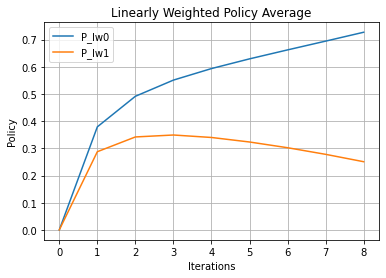

In [36]:
import pandas as pd

pi = [0.75, 0.86]
v = [0.456, 0.346]
Q = [0, 0]
p_sum = [0, 0]

results = []
for T in range(1, 10, 1):
    r_hold = {}
    r_sum = sum([v[i] * pi[i] for i in range(2)])
    for i in range(2):
        r = v[i] - r_sum
        Q[i] = max(Q[i] + r, 0)
        #r_hold[f'Q{i}'] = Q[i]
    q_sum = sum(Q)
    for i in range(2):
        pi[i] = Q[i] / q_sum if q_sum > 0 else 0
        #r_hold[f'P{i}'] = pi[i]
        p_sum[i] += T * pi[i]
        pi[i] = 2 / ((T ** 2) + T) * p_sum[i]
        r_hold[f'P_lw{i}'] = pi[i]
    results.append(r_hold)
    
ax = pd.DataFrame(results).plot(title = 'Linearly Weighted Policy Average',grid = True)
ax.set_xlabel("Iterations")
ax.set_ylabel("Policy")

Text(0, 0.5, 'Policy')

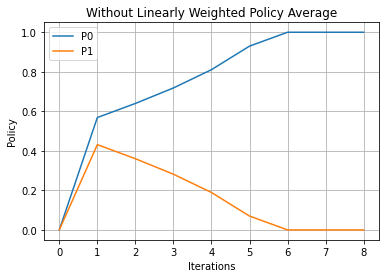

In [37]:
import pandas as pd

pi = [0.75, 0.86]
v = [0.456, 0.346]
Q = [0, 0]
p_sum = [0, 0]

results = []
for T in range(1, 10, 1):
    r_hold = {}
    r_sum = sum([v[i] * pi[i] for i in range(2)])
    for i in range(2):
        r = v[i] - r_sum
        Q[i] = max(Q[i] + r, 0)
        #r_hold[f'Q{i}'] = Q[i]
    q_sum = sum(Q)
    for i in range(2):
        pi[i] = Q[i] / q_sum if q_sum > 0 else 0
        r_hold[f'P{i}'] = pi[i]
        #p_sum[i] += T * pi[i]
        #pi[i] = 2 / ((T ** 2) + T) * p_sum[i]
        #r_hold[f'P_lw{i}'] = pi[i]
    results.append(r_hold)
    
ax = pd.DataFrame(results).plot(title = 'Without Linearly Weighted Policy Average', grid = True)
ax.set_xlabel("Iterations")
ax.set_ylabel("Policy")

In [40]:
from math import log
from copy import deepcopy

class GT_CFR:
    def __init__(self, nn, s, c, action_space, k = 1, c1 = 1.25, c2 = 19652):
        self.T = 0
        self.c1 = c1 #Hyperparameter
        self.c2 = c2 #Hyperparameter
        self.k = k #Total actions to expand
        self.s = s #Total expansion simulations
        self.c = c #Expansion simulations per regret update
        self.H = [] #History
        self.L = {} #Tree
        self.action_space = action_space #Total actions
        self.CVPN = nn
        
    class Node:
        def __init__(self):
            self.N = 0
            self.p_sum = 0
            self.Q = []
            self.v = []
            self.p = []
            self.r = []
            self.actions = []
        
    def state_hash(self, s):
        result = hash(str(s))
        return result
    
    def regret_matching_plus(self, Q, Q_sum):
        return Q / Q_sum if Q_sum > 0 else 0
    
    def pUCT(self, c, p_hash, idx):
        c_hash = self.state_hash(c)
        U = log(sum([self.L[self.state_hash(a)].N + self.c2 + 1 
                     for a in self.L[p_hash].actions]) / self.c2)
        U += self.c1
        U *= self.L[p_hash].p[idx]
        U *= self.L[p_hash].N / (1 + self.L[c_hash].N)
        U += self.L[p_hash].v[idx]
        return U
    
    def CFR_plus(self, s):
        s_hash = self.state_hash(s)
        
        #Use CVPN if leaf node
        if len(self.L[s_hash].actions) == 0: 
            B = (s, self.L[s_hash].r)
            v, p = self.CVPN.predict(B)
            self.L[s_hash].v = v
            self.L[s_hash].p = p

        #Update regret like values
        r_sum = sum([v * p for v, p in zip(self.L[s_hash].v, self.L[s_hash].p)])
        for i in range(len(self.L[s_hash].p)):
            r = self.L[s_hash].v[i] - r_sum #Regret
            self.L[s_hash].r.append(r)
            if len(self.L[s_hash].Q) == len(self.L[s_hash].p):
                self.L[s_hash].Q[i] = max(self.L[s_hash].Q[i] + r, 0)
            else:
                self.L[s_hash].Q.append(max(r, 0))
        
        #Update policy & go to next node
        if len(self.L[s_hash].actions) > 0:
            Q_sum = sum(self.L[s_hash].Q)
            for i, Q in enumerate(self.L[s_hash].Q):
                #Regret matching +
                pi = self.regret_matching_plus(Q, Q_sum)
                #Linearly weighted policy average
                self.L[s_hash].p_sum += pi * self.T
                pi = 2 / (((self.T ** 2) + self.T) * self.L[s_hash].p_sum) if pi != 0 else 0
                self.L[s_hash].p[i] = pi
                #Go to next node
                self.CFR_plus(self.L[s_hash].actions[i])
    
    def expansion(self, s):
        s_hash = self.state_hash(s)
        if len(self.L[s_hash].actions) > 0:
            #Traverse tree
            pi_bank = []
            for i, p in enumerate(self.L[s_hash].p):
                pUCT = self.pUCT(self.L[s_hash].actions[i], s_hash, i)
                pi = (.5 * p) + (.5 * pUCT)
                pi_bank.append(pi)
            m_pi = max(pi_bank)
            a_bank = [i for i, v in enumerate(pi_bank) if v == m_pi]
            a = random.choice(a_bank)
            self.expansion(self.L[s_hash].actions[a])
        else:
            #Add action to tree
            for a in range(self.action_space):
                s_1 = self.perform_action(s, a)
                search.L[s_hash].actions.append(s_1)
                a_hash = self.state_hash(s_1)
                search.L[a_hash] = search.Node()
        self.L[s_hash].N += 1 #Update node visit count
    
    def GT_CFR(self, I):
        for t in range(int(self.s / self.c)):
            self.T = t + 1
            self.CFR_plus(I) #Run CFR
            for _ in range(self.c):
                self.expansion(I) #Grow tree
                
    def perform_action(self, s, a):
        s_1 = deepcopy(s)
        if a == 1 and s_1[0] == 1:
            s_1[-2] += 1
        elif a == 2 and s_1[0] == 1:
            s_1[-1] += s_1[-2]
            s_1[-2] = 0
        elif (a == 0 or a == 1) and s_1[0] == -1:
            s_1[2] = 3 if s_1[1] == 2 else 2
        elif a == 1:
            s_1[-1] += 1
        elif a == 2:
            s_1[-2] += s_1[-1]
            s_1[-1] = 0
        s_1[0] *= -1
        return s_1
    
class CVPN:
    def predict(self, B):
        s, r = B
        c = max(s)
        if c == 3:
            v = [0.5, 0.5, 0]
            p = [0.25, 0.25, 0.25]
        elif c == 2:
            v = [0.25, 0.25, 0.25]
            p = [0.25, 0.25, 0.25]
        else:
            v = [0.5, 0, 0.5]
            p = [0.25, 0.25, 0.25]
        return v, p

In [41]:
nn = CVPN()
search = GT_CFR(nn, 2, 1, 3)

game = Kuhn_Poker()

#Anti up
game.place_bet('p1', 1)
game.place_bet('p2', 1)

#Deal cards
p1, p2 = game.deal()

print(p1, p2)
s = [1] + [game.cards[p1]] + [-1, 1, 1]
s_hash = search.state_hash(s)
search.L[s_hash] = search.Node()
search.L[s_hash].r = [1/(len(game.cards) - 1) if c != p1 else 0 for c in game.cards]

search.GT_CFR(s)

print(search.L[s_hash].actions)
print(search.L[s_hash].Q)

king jack
[[-1, 3, -1, 1, 1], [-1, 3, -1, 2, 1], [-1, 3, -1, 0, 2]]
[0.5, 0.5, 0]


## Average overall Regret
$R^{T}_{i}=\frac{1}{T} \underset{\sigma^{*}_{i}\epsilon \sum_{i}}{\text{max}} \sum^{T}_{t=1}\left(u_{i}(\sigma^{*}_{i},\sigma^{t}_{-i})-u_{i}(\sigma^{t})\right)$

$i=\text{player}$ <br>
$\sigma=\text{player strategy}$ <br>
$u=\text{utitlity function}$ <br>
$T=\text{current time}$

## Regret Matching
$v_{i}(\sigma,h)=\sum_{z \epsilon Z, h \sqsubset z} \pi^{\sigma}_{-i}(h)\pi^{\sigma}_{i}(h,z)u_{i}(z)$

$\pi=\text{policy at curren time step}$ <br>
$h=\text{current state}$ <br>
$u = \text{utility function at current time step for action}$ <br>
$i = \text{player (negative i refers to the opponent)}$

<br>
<br>

$\Delta R^{T}(a)=v^t(a)-\sum_{b \epsilon A}{\sigma^{t}(b)v^{t}(b)}$

$v=\text{counterfactual value}$ <br>
$\sigma = \text{player policy}$ <br>
$t=\text{timestep}$

<br>
<br>

$R^{t}(a)=R^{t-1}(a)+\Delta R^{t}(a)$

$R=\text{regret}$ <br>
$a=\text{action}$ <br>
$t=\text{time step}$

<br>
<br>

$\sigma^{t}(a)=R^{t-1}(a)^{+}/\sum_{b \epsilon A}{R^{t-1}(b)^{+}}$

$R=\text{regret}$ <br>
$t=\text{time step}$ <br>
$x^{+}=max(x,0)$

<br>
<br>

$u^{\sigma}_{i}=\sum_{z}\pi^{\sigma}(z)$

In [4]:
# kuhn poker time
# 3 cards
# 3*2 = 6 hands

HANDS = [(1,2), (1,3), (2,1), (2,3), (3,1), (3,2)]

# there are 12 information sets
# p1(1st) 1 {2,3}
# p1(1st) 2 {1,3}
# p1(1st) 3 {1,2}
# p2(2nd) 1, p1 pass {2,3}
# p2(2nd) 1, p1 bet  {2,3}
# p2(2nd) 2, p1 pass {1,3}
# p2(2nd) 2, p1 bet  {1,3}
# p2(2nd) 3, p1 pass {1,2}
# p2(2nd) 3, p1 bet  {1,2}
# p1(3rd) 1, p1 pass, p2 bet  {2,3}
# p1(3rd) 2, p1 pass, p2 bet  {1,3}
# p1(3rd) 3, p1 pass, p2 bet  {1,2}

ISETS = ["1", "2", "3",   # round 1
         "P1", "P2", "P3", "B1", "B2", "B3",  # round 2
         "PB1", "PB2", "PB3"]  # round 3

# terminal history states
TERMINAL = ["PP", "PBP", "PBB", "BP", "BB"]
ACTIONS = ["P", "B"]

def payout(rs, h):
    if h == "PBP":
        return -1
    elif h == "BP":
        return 1
    m = 1 if (rs[0] > rs[1]) else -1
    if h == "PP":
        return m
    if h in ["BB", "PBB"]:
        return m*2
    assert False

def get_information_set(rs, h):
    assert h not in TERMINAL
    if h == "":
        return str(rs[0])
    elif len(h) == 1:
        return h + str(rs[1])
    else:
        return "PB" + str(rs[0])
    assert False

def cfr(rs, h, i, t, pi1, pi2):
    # rs = realstate
    # h = history
    # i = player
    # t = timestep
    # pi1 = reach probability player 1
    # pi2 = reach probabilty player 2
    
    if h in TERMINAL:
        return payout(rs, h) * (1 if i == 1 else -1)
    I = get_information_set(rs, h)
    ph = 2 if len(h) == 1 else 1 #Player hand
    
    # if we are here, we have both actions available
    vo = 0.0 #Counter factual value
    voa = {}
    for a in ACTIONS:
        if ph == 1: #Player 1
            voa[a] = cfr(rs, h+a, i, t, sigma[t][I][a] * pi1, pi2)
        else: #Player 2
            voa[a] = cfr(rs, h+a, i, t, pi1, sigma[t][I][a] * pi2)
        vo += sigma[t][I][a] * voa[a]
    if ph == i:
        if i == 1:
            pi = pi1
            pnegi = pi2
        else:
            pi = pi2
            pnegi = pi1
        for a in ACTIONS:
            regret[I][a] += pnegi * (voa[a] - vo)
            strategy[I][a] += pi * sigma[t][I][a] #Since PI is set @ 1 the strategy is set to current sigma
        # update the strategy based on regret
        rsum = sum([max(x, 0) for x in regret[I].values()])
        for a in ACTIONS:
            if rsum > 0:
                sigma[t+1][I][a] = max(regret[I][a], 0) / rsum
            else:
                sigma[t+1][I][a] = 0.5
    return vo

In [5]:
# init tables
regret = {}
strategy = {}
for I in ISETS:
    regret[I] = {k:0 for k in ACTIONS}
    strategy[I] = {k:0 for k in ACTIONS}
    
sigma = {}
sigma[1] = {}
for I in ISETS:
    sigma[1][I] = {k:0.5 for k in ACTIONS}

# learn strategy
import copy
import random
for t in range(1, 1000):
    sigma[t+1] = copy.deepcopy(sigma[t])
    for i in [1,2]:
        cfr(random.choice(HANDS), "", i, t, 1, 1)
    del sigma[t]

In [6]:
# print "average" strategy
for k,v in strategy.items():
    norm = sum(list(v.values()))
    print("%3s: P:%.4f B:%.4f" % (k, v['P']/norm, v['B']/norm))
# https://en.wikipedia.org/wiki/Kuhn_poker#Optimal_strategy

  1: P:0.7443 B:0.2557
  2: P:0.9943 B:0.0057
  3: P:0.3312 B:0.6688
 P1: P:0.6164 B:0.3836
 P2: P:0.9938 B:0.0063
 P3: P:0.0015 B:0.9985
 B1: P:0.9985 B:0.0015
 B2: P:0.5886 B:0.4114
 B3: P:0.0015 B:0.9985
PB1: P:0.9990 B:0.0010
PB2: P:0.5094 B:0.4906
PB3: P:0.0024 B:0.9976
